# Installing Packages

In [ ]:
# Enforce pytorch version 1.6.0
import torch

# Check pytorch version and make sure you use a GPU Kernel
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

2.5.1+cu121
12.1
Python 3.10.12
/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu121.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu121.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu121.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.5.1+cu121.html


In [ ]:
!pip install --quiet rdkit
!pip show rdkit

Name: rdkit
Version: 2024.9.3
Summary: A collection of chemoinformatics and machine-learning software written in C++ and Python
Home-page: https://github.com/kuelumbus/rdkit-pypi
Author: Christopher Kuenneth
Author-email: chris@kuenneth.dev
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, Pillow
Required-by: 


# Dataset

In [ ]:
import rdkit
from torch_geometric.datasets import MoleculeNet

# Load the ESOL dataset
data = MoleculeNet(root=".", name="ESOL")
data

ESOL(1128)

In [ ]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

# edge_index = graph connections
# smiles = molecule with its atoms
# x = node features (5 nodes have each 11 features)
# y = labels (dimension)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Sample  nodes:  32
Sample  edges:  68


In [ ]:
data.get_summary()

MoleculeNet (#graphs=1128):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     13.3 |     27.4 |
| std        |      6.9 |     15.9 |
| min        |      1   |      0   |
| quantile25 |      8   |     16   |
| median     |     12   |     24   |
| quantile75 |     18   |     38   |
| max        |     55   |    124   |
+------------+----------+----------+

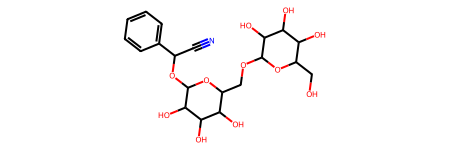

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

In [ ]:
# Investigating the features
# (nodes[features])
# for data[0] => CH4 the molecule has 5 atoms, shape(5,11)
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [ ]:
# Investigating the edges
# Shape [node, node_connected]
data[0].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [ ]:
# Properties of the molecule
data[0].y

tensor([[-0.7700]])

# Implementing the GNN

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size = 64

class GCN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, data.num_classes)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = torch.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = torch.tanh(hidden)

        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)

        return out, hidden

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience
        self.patience_counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.patience_counter = 0
            self.save_checkpoint(val_loss)
        else:
            self.patience_counter += 1
            if self.patience_counter >= self.patience:
                self.early_stop = True

    def save_checkpoint(self, val_loss):
        # Função para salvar o melhor modelo até agora
        print(f"Validation loss improved to {val_loss}. Saving model...")


In [ ]:
# Instancing the Model
model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=734, bias=True)
)
Number of parameters:  107806


# Training the GNN

In [ ]:
def train(loader):
    model.train()  # Define o modelo no modo de treinamento
    epoch_loss = 0
    for batch in loader:
        # Enviar batch para o dispositivo (GPU ou CPU)
        batch = batch.to(device)

        # Resetar gradientes
        optimizer.zero_grad()

        # Passar os dados pelo modelo
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

        # Calcular a perda
        loss = loss_fn(pred, batch.y.float())

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Acumular perda total da época
        epoch_loss += loss.item()

    # Retornar a perda média da época
    return epoch_loss / len(loader)


def validate(loader):
    model.eval()  # Define o modelo no modo de avaliação
    val_loss = 0
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            pred, _ = model(batch.x.float(), batch.edge_index, batch.batch)
            loss = loss_fn(pred, batch.y.float())
            val_loss += loss.item()

    return val_loss / len(loader)

In [ ]:
from torch_geometric.data import DataLoader

# Root mean squared error
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

# Use GPU for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader

# Parâmetros de separação
train_ratio = 0.7  # Proporção de treino
val_ratio = 0.15   # Proporção de validação
test_ratio = 0.15  # Proporção de teste

# Calcular os índices de separação
data_size = len(data)
train_size = int(data_size * train_ratio)
val_size = int(data_size * val_ratio)
test_size = data_size - train_size - val_size  # Restante para o teste

# Divisão dos dados
train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

# Tamanhos dos lotes
NUM_GRAPHS_PER_BATCH = 64

# Criar os DataLoaders
train_loader = DataLoader(train_data, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
val_loader = DataLoader(val_data, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=False)
test_loader = DataLoader(test_data, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=False)

# Exibir tamanhos para conferência
print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")


Train size: 789
Validation size: 169
Test size: 170


In [ ]:
# Early Stopping
early_stopping = EarlyStopping(patience=100)

# Loop de treinamento com validação
print("Starting training...")
losses = []
val_losses = []
for epoch in range(2000):
    train_loss = train(train_loader)
    val_loss = validate(val_loader)
    losses.append(train_loss)
    val_losses.append(val_loss)

    # Feedback
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Verificar early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered. Training stopped.")
        break

Starting training...
Epoch 0 | Train Loss: 0.1904 | Val Loss: 0.4272
Validation loss improved to 0.42721132934093475. Saving model...
Validation loss improved to 0.42682014405727386. Saving model...
Epoch 100 | Train Loss: 0.1891 | Val Loss: 0.4373
Early stopping triggered. Training stopped.


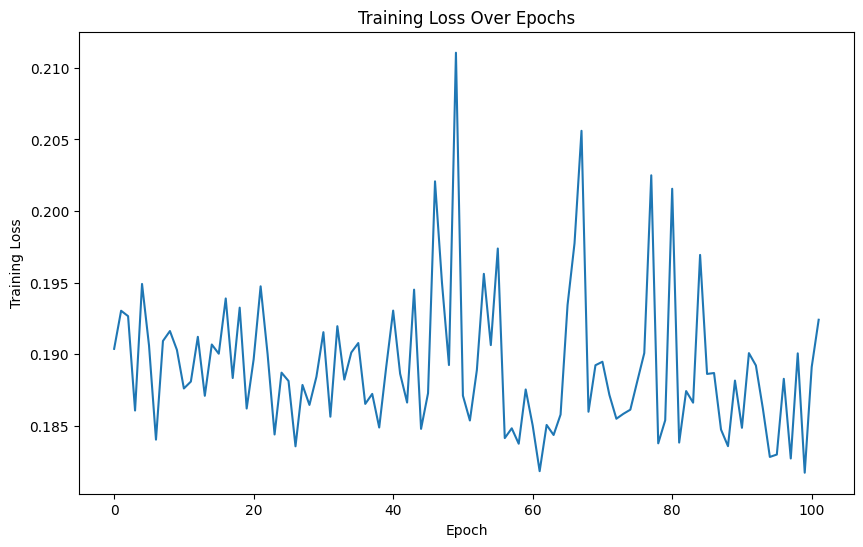

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Certificar-se de que as perdas estão no formato de lista de floats
if isinstance(losses[0], torch.Tensor):  # Verificar se os elementos são tensores
    losses_float = [loss.cpu().detach().item() for loss in losses]
else:
    losses_float = [float(loss) for loss in losses]

# Índices para o eixo x
loss_indices = list(range(len(losses_float)))

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=loss_indices, y=losses_float)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.show()


In [ ]:
import pandas as pd

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-1.600,-1.191613
1,-2.460,-1.925321
2,-4.230,-3.756371
3,-5.284,-4.778327
4,-6.140,-5.548499
...,...,...
59,-6.090,-6.189000
60,-5.030,-6.312224
61,-7.200,-6.949791
62,-0.220,0.104635


<Axes: title={'center': 'Scatter Plot with Reference Line'}, xlabel='Real Values', ylabel='Predicted Values'>

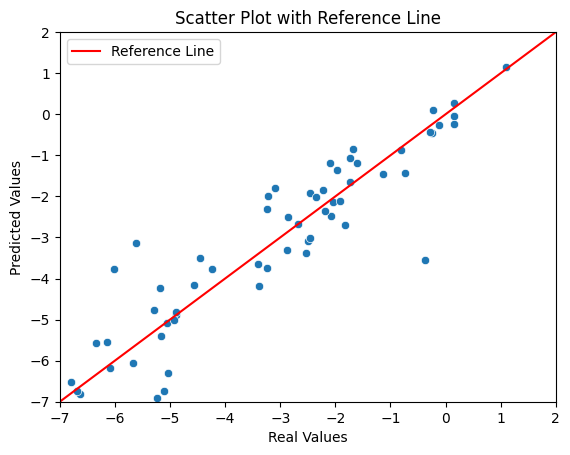

In [ ]:
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.plot([-7, 2], [-7, 2], color='red', linestyle='-', label='Reference Line')

plt.set_xlabel("Real Values")
plt.set_ylabel("Predicted Values")
plt.set_title("Scatter Plot with Reference Line")

plt.legend()

plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))

plt